In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression


In [2]:
df=sns.load_dataset('iris')

In [5]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
58,6.6,2.9,4.6,1.3,versicolor
101,5.8,2.7,5.1,1.9,virginica
139,6.9,3.1,5.4,2.1,virginica
26,5.0,3.4,1.6,0.4,setosa
132,6.4,2.8,5.6,2.2,virginica
14,5.8,4.0,1.2,0.2,setosa
68,6.2,2.2,4.5,1.5,versicolor
102,7.1,3.0,5.9,2.1,virginica
91,6.1,3.0,4.6,1.4,versicolor
71,6.1,2.8,4.0,1.3,versicolor


In [10]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
lb=LabelEncoder()
df['species']=lb.fit_transform(df['species'])

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df=df[['sepal_length','petal_length','species']]

In [27]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]
Y=Y.values.reshape(-1,1)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [34]:
lr=LogisticRegression(multi_class='multinomial')

     sepal_length  petal_length
22            4.6           1.0
15            5.7           1.5
65            6.7           4.4
11            4.8           1.6
42            4.4           1.3
..            ...           ...
71            6.1           4.0
106           4.9           4.5
14            5.8           1.2
92            5.8           4.0
102           7.1           5.9

[120 rows x 2 columns]


In [35]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [36]:
from sklearn.metrics import accuracy_score

In [42]:
print(accuracy_score(y_test,y_pred))

1.0


In [38]:
from sklearn.metrics import confusion_matrix

In [43]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,10,0,0
1,0,9,0
2,0,0,11


In [45]:
query=np.array([[3.4,2.7]])
lr.predict_proba(query)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[8.09242380e-01, 1.90157191e-01, 6.00428887e-04]])

In [46]:
lr.predict(query)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [48]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.4 MB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.9 MB/s eta 0:00:00


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'softmax on iris')

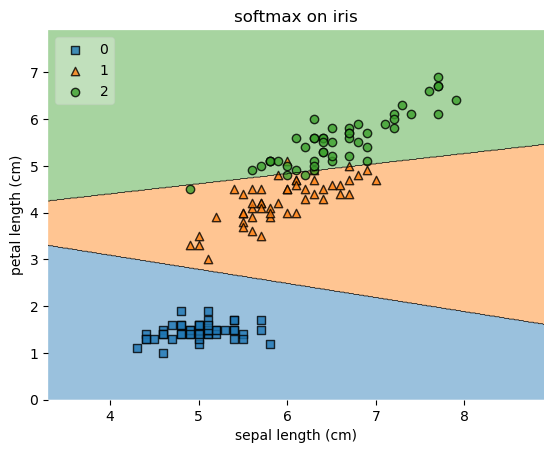

In [54]:
from mlxtend.plotting import plot_decision_regions

Y=Y.ravel()
plot_decision_regions(X.values,Y,lr,legend=2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('softmax on iris')
